In [1]:
import os

In [2]:
import pandas as pd
import numpy as np
import nltk

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
DATA_DIR = os.path.abspath('./datasets/spam_or_ham/train.csv')

In [5]:
# nltk.download('stopwords')


## Loading Data

In [6]:
df = pd.read_csv(DATA_DIR)
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df[df['Category']=="spam"]

,Category,Message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [8]:
df.dropna(inplace=True)

In [9]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [10]:
y = df['Category']
X = df['Message']

In [11]:
X[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [12]:
labels=list(set(df['Category']))
labels

['spam', 'ham']

### Processing Data

In [13]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
stop_words = set(stopwords.words('english'))

In [15]:
# tfidfVectorizer = TfidfVectorizer(stop_words=nepali_stop_words,encoding='utf-8',decode_error='ignore')

In [16]:
tfidfVectorizer = TfidfVectorizer(tokenizer= lambda x: x.split(" "),
                                  sublinear_tf=True, encoding='utf-8',
                                  decode_error='ignore',
                                  max_df=0.5,
                                  min_df=10,
                                  stop_words=stop_words)

In [17]:
X_vectorized = tfidfVectorizer.fit_transform(X)

In [18]:
X_vectorized

<5572x913 sparse matrix of type '<class 'numpy.float64'>'
	with 30213 stored elements in Compressed Sparse Row format>

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [20]:
X_train.shape, y_train.shape

((4457,), (4457,))

In [21]:
X_test.shape, y_test.shape

((1115,), (1115,))

## SVC Classifier

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import f1_score

In [23]:
svc_clf = Pipeline([
    ('vectorizer',tfidfVectorizer),
    ('chi2',SelectKBest(chi2,k=100)),
    ('clf',SVC())
])
svc_clf_no_feat_sel = Pipeline([
    ('vectorizer',tfidfVectorizer),

    ('clf',SVC())
])

In [24]:
svc_clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(decode_error='ignore', max_df=0.5, min_df=10,
                                 stop_words={'a', 'about', 'above', 'after',
                                             'again', 'against', 'ain', 'all',
                                             'am', 'an', 'and', 'any', 'are',
                                             'aren', "aren't", 'as', 'at', 'be',
                                             'because', 'been', 'before',
                                             'being', 'below', 'between',
                                             'both', 'but', 'by', 'can',
                                             'couldn', "couldn't", ...},
                                 sublinear_tf=True,
                                 tokenizer=<function <lambda> at 0x7fd514d68af0>)),
                ('chi2',
                 SelectKBest(k=100,
                             score_func=<function chi2 at 0x7fd514cdcb80>)),
       

In [25]:
svc_clf_no_feat_sel.fit(X_train,y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(decode_error='ignore', max_df=0.5, min_df=10,
                                 stop_words={'a', 'about', 'above', 'after',
                                             'again', 'against', 'ain', 'all',
                                             'am', 'an', 'and', 'any', 'are',
                                             'aren', "aren't", 'as', 'at', 'be',
                                             'because', 'been', 'before',
                                             'being', 'below', 'between',
                                             'both', 'but', 'by', 'can',
                                             'couldn', "couldn't", ...},
                                 sublinear_tf=True,
                                 tokenizer=<function <lambda> at 0x7fd514d68af0>)),
                ('clf', SVC())])

In [26]:
print("Accuracy on train Set : ", svc_clf.score(X_train,y_train))
print("Accuracy on test Set : ", svc_clf.score(X_test,y_test))


Accuracy on train Set :  0.9802557774287638
Accuracy on test Set :  0.967713004484305


In [27]:
print("Accuracy on train Set : ", svc_clf_no_feat_sel.score(X_train,y_train))
print("Accuracy on test Set : ", svc_clf_no_feat_sel.score(X_test,y_test))

Accuracy on train Set :  0.9916984518734575
Accuracy on test Set :  0.9739910313901345


In [28]:
f1_score(svc_clf.predict(X_test),y_test,average='micro')

0.967713004484305

### Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rf_clf = Pipeline([
    ('vectorizer',tfidfVectorizer),
    ('chi2',SelectKBest(chi2,k=100)),
    ('clf',RandomForestClassifier(
            n_estimators=2000, 
            max_depth=20, 
            min_samples_split=6, 
            min_samples_leaf=5, 
            bootstrap=True,
            verbose=1,
            n_jobs = -1
        )
    )
])
rf_clf_no_feat_sel = Pipeline([
    ('vectorizer',tfidfVectorizer),
    ('clf',RandomForestClassifier(
            n_estimators=2000, 
            max_depth=20, 
            min_samples_split=6, 
            min_samples_leaf=5, 
            bootstrap=True,
            verbose=1,
            n_jobs = -1
        )
    )
])

In [31]:
rf_clf.fit(X_train,y_train)
rf_clf_no_feat_sel.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   11.9s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:   18.3s
[Parallel(n_jobs=

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(decode_error='ignore', max_df=0.5, min_df=10,
                                 stop_words={'a', 'about', 'above', 'after',
                                             'again', 'against', 'ain', 'all',
                                             'am', 'an', 'and', 'any', 'are',
                                             'aren', "aren't", 'as', 'at', 'be',
                                             'because', 'been', 'before',
                                             'being', 'below', 'between',
                                             'both', 'but', 'by', 'can',
                                             'couldn', "couldn't", ...},
                                 sublinear_tf=True,
                                 tokenizer=<function <lambda> at 0x7fd514d68af0>)),
                ('clf',
                 RandomForestClassifier(max_depth=20, min_samples_leaf=5,
                                        min_sam

In [32]:
print("Accuracy on train Set : ", rf_clf.score(X_train,y_train))
print("Accuracy on test Set : ", rf_clf.score(X_test,y_test))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    2.2s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    3.0s
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:    4.0s
[Parallel(n_jobs=8)]: Done 2000 out of 2000 | elapsed:    4.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s


Accuracy on train Set :  0.9587166255328696


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    1.9s
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:    2.6s


Accuracy on test Set :  0.9533632286995516


[Parallel(n_jobs=8)]: Done 2000 out of 2000 | elapsed:    2.9s finished


In [33]:
print("Accuracy on train Set : ", rf_clf_no_feat_sel.score(X_train,y_train))
print("Accuracy on test Set : ", rf_clf_no_feat_sel.score(X_test,y_test))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:    2.3s
[Parallel(n_jobs=8)]: Done 2000 out of 2000 | elapsed:    2.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s


Accuracy on train Set :  0.9580435270361229


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    1.7s
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:    2.7s


Accuracy on test Set :  0.9533632286995516


[Parallel(n_jobs=8)]: Done 2000 out of 2000 | elapsed:    3.0s finished


In [34]:
f1_score(rf_clf.predict(X_test),y_test,average='micro')

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    2.1s
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:    3.0s
[Parallel(n_jobs=8)]: Done 2000 out of 2000 | elapsed:    3.4s finished


0.9533632286995516

### Naive Bayes

In [35]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB

In [36]:
bnb_clf = Pipeline([
    ('vect', tfidfVectorizer),
    ('chi2',SelectKBest(chi2,k=100)),
    ('clf', BernoulliNB(alpha=0.01))
])

mnb_clf = Pipeline([
    ('vect', tfidfVectorizer),
    ('chi2',SelectKBest(chi2,k=100)),
    ('clf', MultinomialNB(alpha=0.01, fit_prior=True))
])

In [37]:
bnb_clf.fit(X_train,y_train)

Pipeline(steps=[('vect',
                 TfidfVectorizer(decode_error='ignore', max_df=0.5, min_df=10,
                                 stop_words={'a', 'about', 'above', 'after',
                                             'again', 'against', 'ain', 'all',
                                             'am', 'an', 'and', 'any', 'are',
                                             'aren', "aren't", 'as', 'at', 'be',
                                             'because', 'been', 'before',
                                             'being', 'below', 'between',
                                             'both', 'but', 'by', 'can',
                                             'couldn', "couldn't", ...},
                                 sublinear_tf=True,
                                 tokenizer=<function <lambda> at 0x7fd514d68af0>)),
                ('chi2',
                 SelectKBest(k=100,
                             score_func=<function chi2 at 0x7fd514cdcb80>)),
             

In [38]:
print("Accuracy on train Set : ", bnb_clf.score(X_train,y_train))
print("Accuracy on test Set : ", bnb_clf.score(X_test,y_test))

Accuracy on train Set :  0.9665694413282477
Accuracy on test Set :  0.9650224215246637


In [39]:
mnb_clf.fit(X_train,y_train)

Pipeline(steps=[('vect',
                 TfidfVectorizer(decode_error='ignore', max_df=0.5, min_df=10,
                                 stop_words={'a', 'about', 'above', 'after',
                                             'again', 'against', 'ain', 'all',
                                             'am', 'an', 'and', 'any', 'are',
                                             'aren', "aren't", 'as', 'at', 'be',
                                             'because', 'been', 'before',
                                             'being', 'below', 'between',
                                             'both', 'but', 'by', 'can',
                                             'couldn', "couldn't", ...},
                                 sublinear_tf=True,
                                 tokenizer=<function <lambda> at 0x7fd514d68af0>)),
                ('chi2',
                 SelectKBest(k=100,
                             score_func=<function chi2 at 0x7fd514cdcb80>)),
             

In [40]:
print("Accuracy on train Set : ", mnb_clf.score(X_train,y_train))
print("Accuracy on test Set : ", mnb_clf.score(X_test,y_test))

Accuracy on train Set :  0.9385236706304689
Accuracy on test Set :  0.9273542600896861


## Classification Report


In [41]:
from sklearn.metrics import classification_report

#### SVM

In [42]:
y_pred = svc_clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.98      0.99      0.98       961
        spam       0.90      0.86      0.88       154

    accuracy                           0.97      1115
   macro avg       0.94      0.92      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [43]:
y_pred = svc_clf_no_feat_sel.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       961
        spam       0.99      0.82      0.90       154

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



### Naive Bayes

In [44]:
y_pred = bnb_clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       961
        spam       0.97      0.77      0.86       154

    accuracy                           0.97      1115
   macro avg       0.97      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [45]:
y_pred = mnb_clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.92      1.00      0.96       961
        spam       0.97      0.49      0.65       154

    accuracy                           0.93      1115
   macro avg       0.95      0.74      0.80      1115
weighted avg       0.93      0.93      0.92      1115



### Random Forest

In [46]:
y_pred = rf_clf.predict(X_test)
print(classification_report(y_test,y_pred))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    2.0s
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:    2.5s


              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       961
        spam       0.97      0.68      0.80       154

    accuracy                           0.95      1115
   macro avg       0.96      0.84      0.89      1115
weighted avg       0.95      0.95      0.95      1115



[Parallel(n_jobs=8)]: Done 2000 out of 2000 | elapsed:    2.7s finished


In [47]:
y_pred = rf_clf_no_feat_sel.predict(X_test)
print(classification_report(y_test,y_pred))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    1.7s
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:    2.4s


              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       961
        spam       0.98      0.68      0.80       154

    accuracy                           0.95      1115
   macro avg       0.97      0.84      0.89      1115
weighted avg       0.95      0.95      0.95      1115



[Parallel(n_jobs=8)]: Done 2000 out of 2000 | elapsed:    2.7s finished


In [48]:
best_classifier = svc_clf

In [49]:
best_classifier.named_steps['clf']

SVC()

In [50]:
import pickle
with open('svc_clf_test_set_72_acc.pkl','wb') as f:
    pickle.dump(best_classifier.named_steps['clf'], f) 


In [51]:
with open('svc_clf_test_set_72_acc.pkl','rb') as f:
    model = pickle.load(f)

In [52]:
model

SVC()

### Classification Task

In [53]:
text = '''
What up my boy. You doing alright after the your leg fracture?
'''

In [54]:
svc_clf.predict([text])

array(['ham'], dtype=object)

In [55]:
mnb_clf.predict([text])

array(['ham'], dtype='<U4')

In [56]:
bnb_clf.predict([text])

array(['ham'], dtype='<U4')

In [57]:
rf_clf.predict([text])

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done 2000 out of 2000 | elapsed:    1.2s finished


array(['ham'], dtype=object)

In [58]:
text = '''
Big Chance!!! Take our 1 minute survey & tell us all about ur shopping experience As a thank you for sharing your thoughts with us, you will get a huge chance to win a
$100 cvs gift card. Are you ready? Click the button below and follow the instructions. 
'''

In [59]:
svc_clf.predict([text])

array(['spam'], dtype=object)

In [60]:
mnb_clf.predict([text])

array(['ham'], dtype='<U4')

In [61]:
bnb_clf.predict([text])

array(['spam'], dtype='<U4')

In [62]:
rf_clf.predict([text])

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done 2000 out of 2000 | elapsed:    1.3s finished


array(['spam'], dtype=object)

### Top 15 Important Tokens for Spam/Ham

In [63]:
import matplotlib.pyplot as plt

In [64]:
clf = rf_clf.named_steps.get('clf')
k_best = rf_clf.named_steps.get('chi2')

In [65]:
f = k_best.get_support(True)
f.shape

(100,)

In [66]:
tokens = tfidfVectorizer.get_feature_names()

In [67]:
X_new = [token for i,token in enumerate(tokens) if i in f ]

In [68]:
y = list(clf.feature_importances_)

In [69]:
results = sorted(zip(X_new,y),key=lambda x:x[1],reverse=True)
results[:10]

[('call', 0.16968084070781542),
 ('txt', 0.11244964829139437),
 ('free', 0.07787026774591967),
 ('claim', 0.07204204944304873),
 ('mobile', 0.05788783491764739),
 ('reply', 0.052228653724516315),
 ('win', 0.04075983727381441),
 ('now!', 0.03301725188633262),
 ('stop', 0.032447422065026224),
 ('&', 0.03180402478270661)]

[]

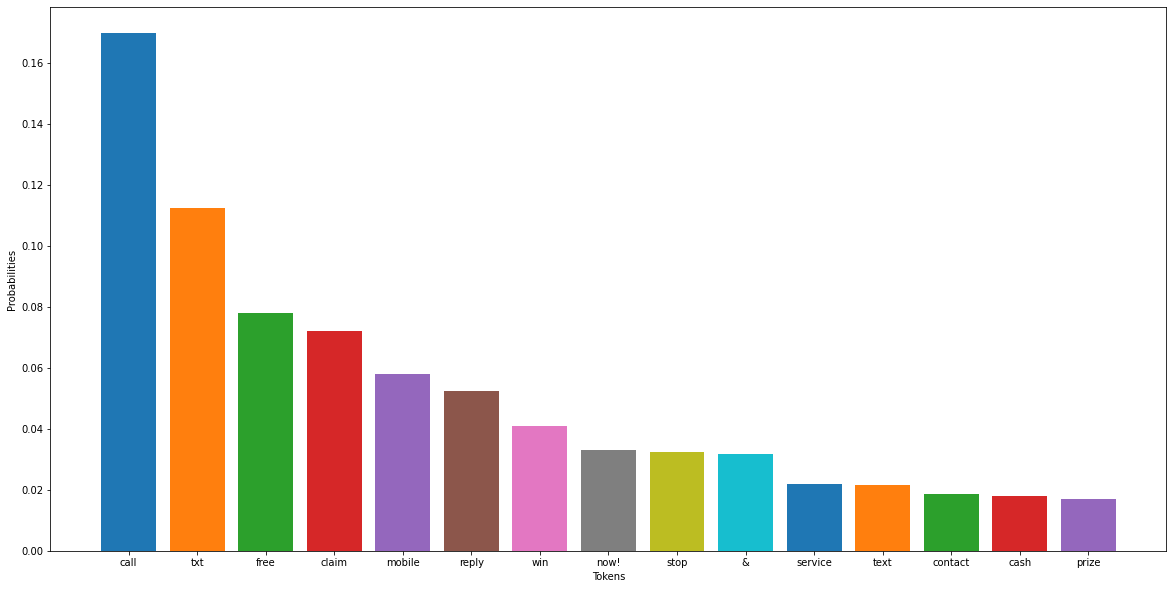

In [70]:
fig = plt.figure(figsize=(20,10))
for x,y in results[:15]:
    plt.bar(x,y)
plt.xlabel("Tokens")
plt.ylabel("Probabilities")
plt.plot()